# MovieLens Data Set Recommendation System

In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names=['user_id','item_id','rating','timestamp']

In [3]:
df=pd.read_csv('u.data',sep='\t',names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles=pd.read_csv('Movie_Id_Titles')

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
#merging the dataframes
df=pd.merge(df,movie_titles,on='item_id')

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [9]:
# finding the best rated movie here
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set_style('white')
%matplotlib inline

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [16]:
ratings =pd.DataFrame(df.groupby('title')['rating'].mean())

In [18]:
ratings['no. of ratings']=df.groupby('title')['rating'].count()

In [19]:
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

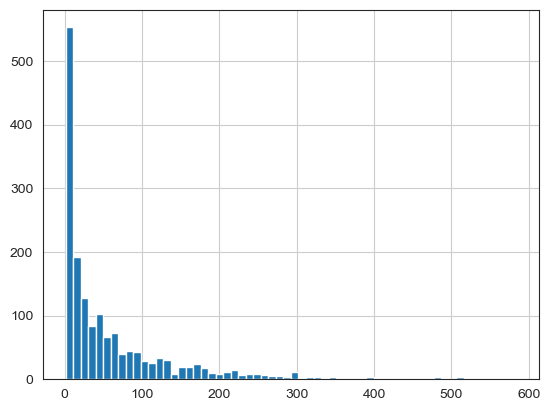

In [20]:
ratings['no. of ratings'].hist(bins=60)

<Axes: >

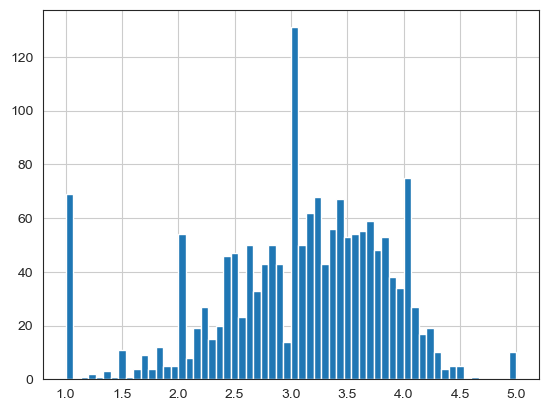

In [21]:
ratings['rating'].hist(bins=60)

We can observe that most movies have been rated  normally between 3 and 4, which is quite an expected distribution. We can note, 1 star movies are quite outliers in this case, as they are just bad movies and so less amount of people watched it and rated it straight 1/5.

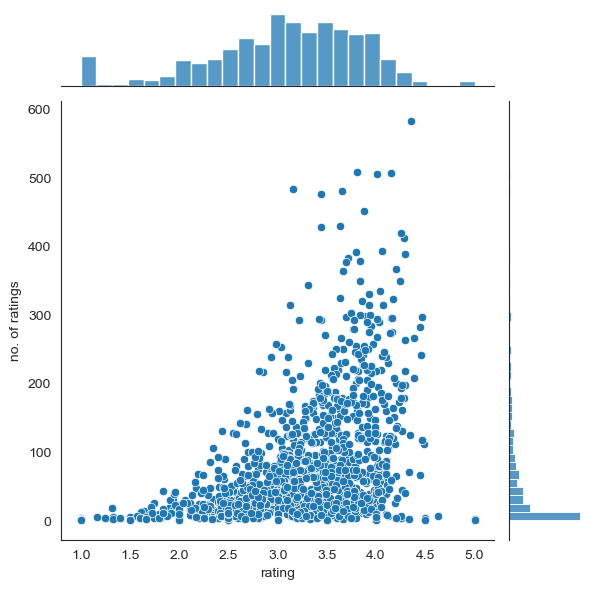

In [22]:
sns.jointplot(x='rating',y='no. of ratings',data=ratings)

Here, it can be observed that, as a movie starts receiving more and more reviews, its ratings also increase. That means, people watched movies based on ratings of other viewers. This essentially leads to conclusion that, more rating mean more viewers, which is quite a normall takeaway from this data.

### Building the recommender system based on these observations

In [24]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')

In [25]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ratings.sort_values('no. of ratings',ascending=False).head(10)

,rating,no. of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [27]:
starwars_user_ratings=moviemat['Star Wars (1977)']
liarliar_user_ratings=moviemat['Liar Liar (1997)']

In [28]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [29]:
moviemat.corrwith(starwars_user_ratings)
#finding correlation with other movies

C:\Users\dbhav\anaconda3\envs\dhruv\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\dbhav\anaconda3\envs\dhruv\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [30]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

C:\Users\dbhav\anaconda3\envs\dhruv\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\dbhav\anaconda3\envs\dhruv\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [31]:
similar_to_liarliar=moviemat.corrwith(liarliar_user_ratings)

C:\Users\dbhav\anaconda3\envs\dhruv\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\dbhav\anaconda3\envs\dhruv\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [32]:
corr_starwars= pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [34]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [35]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Here, we come to observe that, movies that dont have any relation to starwars genre also get perfect correlation with starwars. This happens because, users that gave Star Wars some rating gave other bunch of movies the same rating. We need to remove this anomaly.

In [36]:
 #filltering out movies with more that a 100 reviews

In [40]:
corr_starwars.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [42]:
corr_starwars[corr_starwars['no. of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [46]:
corr_liarliar =pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [47]:
corr_liarliar.head(10)

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [48]:
corr_liarliar.dropna(inplace=True)

In [49]:
corr_liarliar =corr_liarliar.join(ratings['no. of ratings'])

In [52]:
corr_liarliar[corr_liarliar['no. of ratings']>200].sort_values('Correlation',ascending=False).head()

,Correlation,no. of ratings
title,,
Liar Liar (1997),1.000000,485
Indiana Jones and the Last Crusade (1989),0.414427,331
Top Gun (1986),0.405720,220
Back to the Future (1985),0.378028,350
Jurassic Park (1993),0.370770,261
